In [4]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [6]:
# Read the data from 'NewData.csv' into a pandas DataFrame
df = pd.read_csv('NewData.csv')

In [8]:
# Extract all columns except the first one and store them in X as a NumPy array
X = df.iloc[:,1:].values

# Extract the first column and store it in y as a NumPy array
y = df.iloc[:,0].values

In [10]:
# Splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Importing KNN from inbuilt library
from sklearn.neighbors import KNeighborsClassifier

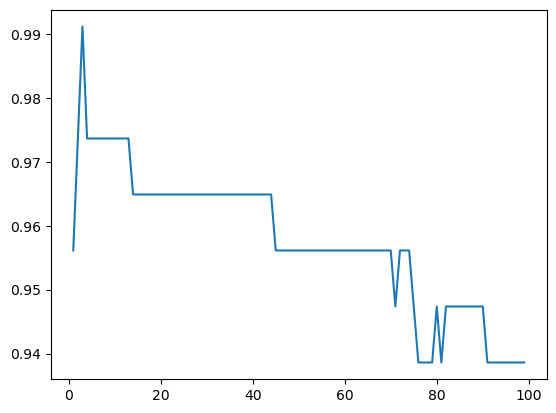

In [15]:
# Finding most suitable 'k' 
scores = []

for i in range(1,100):
    knn_test = KNeighborsClassifier(n_neighbors = i)
    knn_test.fit(X_train,y_train)
    y_pred = knn_test.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(range(1,100), scores)

In [16]:
# Creating object knn from the built in library( using StandardScaler)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
# Testing accuracy of 'knn' 
y_pred = knn.predict(X_test)
print("The accuracy score of KNN model is ", accuracy_score(y_test,y_pred)*100)
print("The recall score of KNN model is ", recall_score(y_test,y_pred)*100)
print("The precision score of KNN model is ", precision_score(y_test,y_pred)*100)
print("The f1 score of KNN model is ", recall_score(y_test,y_pred)*100)

The accuracy score of KNN model is  98.24561403508771
The recall score of KNN model is  95.55555555555556
The precision score of KNN model is  100.0
The f1 score of KNN model is  95.55555555555556


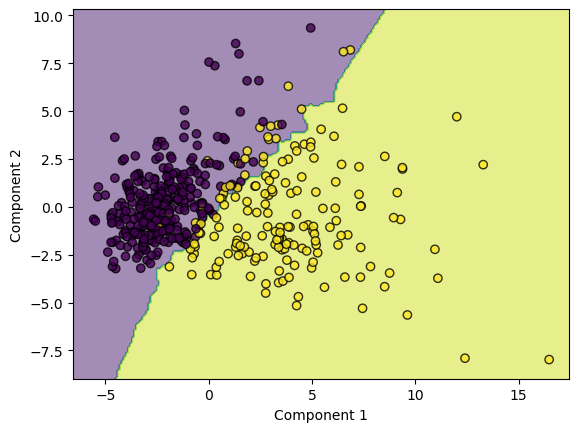

In [28]:
# Creating a DECISION SURFACE using PCA(Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)
a = np.arange(start = X_pca_train[:, 0].min() - 1,stop = X_pca_train[:, 0].max() + 1, step = 0.1)
b = np.arange(start = X_pca_train[:, 1].min() - 1,stop = X_pca_train[:, 1].max() + 1, step = 0.1)
XX, YY = np.meshgrid(a,b)
input_array = np.c_[XX.ravel(), YY.ravel()]
labels = knn.predict(pca.inverse_transform(input_array))
plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1], c=y_train, edgecolor='k', alpha=0.8)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

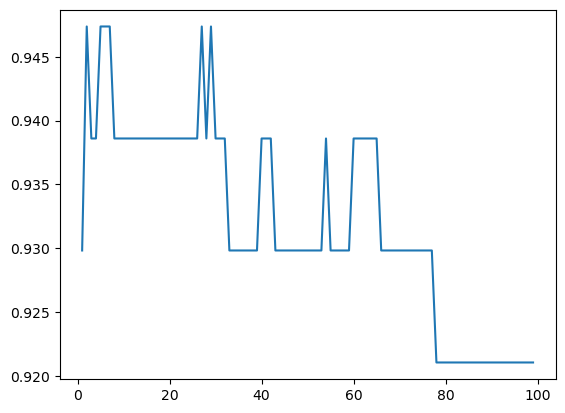

In [29]:
# Finding most suitable 'k' (PCA version)
scores = []

for i in range(1,100):
    knn_test = KNeighborsClassifier(n_neighbors = i)
    knn_test.fit(X_pca_train,y_train)
    y_pred = knn_test.predict(X_pca_test)
    scores.append(accuracy_score(y_test,y_pred))
plt.plot(range(1,100), scores)

In [30]:
class KNN:
    def __init__(self,n_neighbors):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self,X_test):
        y_pred = []
        for i in X_test:
            distances=[]
            for j in self.X_train:
                distances.append(self.calculate_distance(i,j))
            k = sorted(list(enumerate(distances)), key=lambda x:x[1])[0:self.n_neighbors]
            labels = self.majority_count(k)
            y_pred.append(labels)
        return np.array(y_pred)
    def calculate_distance(self, cord_A, cord_B):
       return np.linalg.norm(cord_A-cord_B)  
    def majority_count(self, neighbors):
        votes = []
        for i in neighbors:
            votes.append(self.y_train[i[0]])
        votes = Counter(votes)
        return votes.most_common()[0][0]
        

In [31]:
knn = KNN(n_neighbors = 8)

In [32]:
knn.fit(X_train,y_train)

In [33]:
y_pred1 = knn.predict(X_test)

In [35]:
print(accuracy_score(y_test,y_pred1)*100)

98.24561403508771
